In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from general_graph_utils import *

# Plot features

In [2]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

# Quick test of pipeline

In [97]:
G, G_ud = random_graph(n=10)

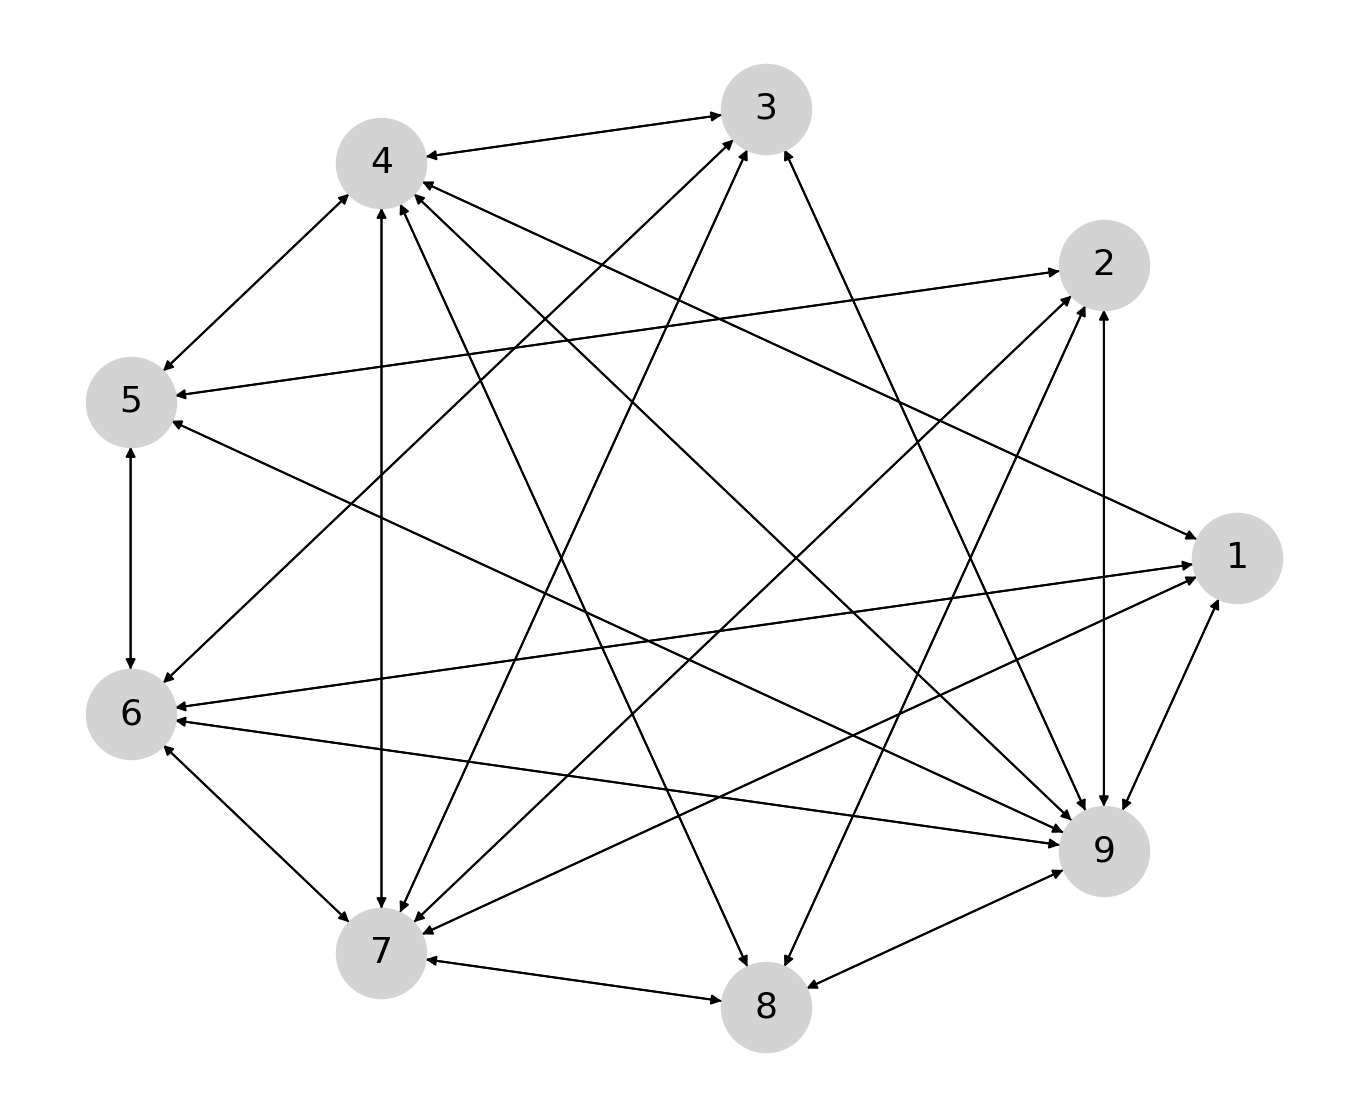

In [98]:
fig, ax = plt.subplots(figsize = (12, 10))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [99]:
node_list = get_nodes(G)
num_nodes = len(node_list)
print(node_list)

[1 2 3 4 5 6 7 8 9]


In [100]:
edge_list = get_edges(G)
print(edge_list)

[[1 9]
 [1 4]
 [1 6]
 [1 7]
 [2 8]
 [2 5]
 [2 9]
 [2 7]
 [3 7]
 [3 4]
 [3 6]
 [3 9]
 [4 9]
 [4 7]
 [4 8]
 [4 1]
 [4 3]
 [4 5]
 [5 2]
 [5 9]
 [5 4]
 [5 6]
 [6 7]
 [6 9]
 [6 1]
 [6 3]
 [6 5]
 [7 6]
 [7 3]
 [7 2]
 [7 1]
 [7 4]
 [7 8]
 [8 9]
 [8 7]
 [8 2]
 [8 4]
 [9 3]
 [9 2]
 [9 8]
 [9 1]
 [9 4]
 [9 5]
 [9 6]]


In [101]:
cycle_list = get_cycle_nodes(G_ud)
num_cycles = len(cycle_list)
print(cycle_list)

[[6, 7, 1], [4, 7, 1], [9, 8, 7, 1], [2, 8, 7], [4, 8, 7], [9, 2, 7, 1], [9, 5, 2], [4, 5, 2, 7], [6, 5, 2, 7], [4, 3, 7], [9, 3, 7, 1], [6, 3, 7], [9, 6, 1], [9, 4, 1]]


In [102]:
label_dict, label_list = get_labels(G)
print(label_dict)
print(label_list)

{(1, 9): 3.5309, (1, 4): 9.10588, (1, 6): 0.00126, (1, 7): 0.01186, (2, 8): 0.00802, (2, 5): 0.66155, (2, 9): 529.7007, (2, 7): 0.08397, (3, 7): 168.46072, (3, 4): 21.15449, (3, 6): 601.21122, (3, 9): 0.77148, (4, 9): 0.0877, (4, 7): 0.0694, (4, 8): 0.00109, (4, 1): 0.12797, (4, 3): 0.18402, (4, 5): 14.46348, (5, 2): 2.37774, (5, 9): 0.00221, (5, 4): 3.20184, (5, 6): 0.00963, (6, 7): 4.47526, (6, 9): 359.94971, (6, 1): 652.2569, (6, 3): 0.12159, (6, 5): 138.71935, (7, 6): 0.10966, (7, 3): 5.36168, (7, 2): 0.00742, (7, 1): 0.46477, (7, 4): 0.00135, (7, 8): 551.98814, (8, 9): 7.85311, (8, 7): 0.13678, (8, 2): 0.09767, (8, 4): 1.98118, (9, 3): 28.42825, (9, 2): 123.16336, (9, 8): 0.28287, (9, 1): 101.45169, (9, 4): 0.00347, (9, 5): 0.04276, (9, 6): 0.95137}
[3.5309000e+00 9.1058800e+00 1.2600000e-03 1.1860000e-02 8.0200000e-03
 6.6155000e-01 5.2970070e+02 8.3970000e-02 1.6846072e+02 2.1154490e+01
 6.0121122e+02 7.7148000e-01 8.7700000e-02 6.9400000e-02 1.0900000e-03
 1.2797000e-01 1.84020

In [103]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [104]:
cycle_edges_backward

[[(7, 6), (1, 7), (6, 1)],
 [(7, 4), (1, 7), (4, 1)],
 [(8, 9), (7, 8), (1, 7), (9, 1)],
 [(8, 2), (7, 8), (2, 7)],
 [(8, 4), (7, 8), (4, 7)],
 [(2, 9), (7, 2), (1, 7), (9, 1)],
 [(5, 9), (2, 5), (9, 2)],
 [(5, 4), (2, 5), (7, 2), (4, 7)],
 [(5, 6), (2, 5), (7, 2), (6, 7)],
 [(3, 4), (7, 3), (4, 7)],
 [(3, 9), (7, 3), (1, 7), (9, 1)],
 [(3, 6), (7, 3), (6, 7)],
 [(6, 9), (1, 6), (9, 1)],
 [(4, 9), (1, 4), (9, 1)]]

In [105]:
cycle_edges_forward

[[(6, 7), (7, 1), (1, 6)],
 [(4, 7), (7, 1), (1, 4)],
 [(9, 8), (8, 7), (7, 1), (1, 9)],
 [(2, 8), (8, 7), (7, 2)],
 [(4, 8), (8, 7), (7, 4)],
 [(9, 2), (2, 7), (7, 1), (1, 9)],
 [(9, 5), (5, 2), (2, 9)],
 [(4, 5), (5, 2), (2, 7), (7, 4)],
 [(6, 5), (5, 2), (2, 7), (7, 6)],
 [(4, 3), (3, 7), (7, 4)],
 [(9, 3), (3, 7), (7, 1), (1, 9)],
 [(6, 3), (3, 7), (7, 6)],
 [(9, 6), (6, 1), (1, 9)],
 [(9, 4), (4, 1), (1, 9)]]

In [107]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[ 0.00000000e+00 -2.06703144e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.98788468e-16
  0.00000000e+00  1.12865446e-16  1.78459678e-16  0.00000000e+00
  0.00000000e+00  1.75423912e-16]


In [108]:
initial_equilibrium_parameters_2(num_cycles,cycle_list,cycle_edges_forward,products_f,products_b,total_affinities)

([[1448.5816521236140488, 0.46477000000000007, 0.0012599999999999998],
  [4.84135152377331e-07, 0.46477000000000011254, 9.105879999999997],
  [23236.424271235402557, 0.13678000000000004, 0.46477, 3.5308999999999995],
  [4460.551755440777, 0.13678000000000001268, 0.00742],
  [411014.1601080994587, 0.13678, 0.0013499999999999999],
  [34.318695283095287607, 0.08397, 0.46477, 3.5309],
  [0.00014296889648729018221, 2.37774, 529.7007],
  [4.046722180964474, 2.3777400000000006594, 0.08397, 0.00135],
  [0.009662163434662538, 2.37774, 0.08397000000000000297, 0.10966],
  [34.612303214300144207, 168.46072000000004, 0.00135],
  [0.018003103550299753407, 168.46072, 0.46477, 3.5309],
  [780.9070525221946, 168.46072000000000911, 0.10966],
  [0.01997871534514738, 652.25690000000008695, 3.5309],
  [179.30285889824244502, 0.12797000000000003, 3.5309]],
 [(6, 7),
  (7, 1),
  (9, 8),
  (8, 7),
  (4, 8),
  (9, 2),
  (9, 5),
  (5, 2),
  (2, 7),
  (4, 3),
  (9, 3),
  (3, 7),
  (6, 1),
  (9, 4)])

In [47]:
cycle_labels_forward

[[0.16322500608175555, 0.10366000000000002, 0.0018399999999999996],
 [0.00016174272381321763, 852.5492599999999, 0.37336],
 [3.143371700217978e-11, 852.54926, 0.10366, 1.42018],
 [1.1642922941663704e-05, 0.05559000000000001, 1.42018]]

In [109]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[ 1.36609474e-17  1.11022302e-16 -2.50450702e-17 -2.78639958e-17
 -2.11961525e-17  2.53703308e-17  6.83047369e-17  5.80048162e-17
  3.44776291e-17 -3.85433872e-17 -8.39172482e-17 -5.39932682e-17
  4.29344060e-17  2.27682456e-18]


In [49]:
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)

# Making new functions

In [15]:
N = 4

In [16]:
G, G_ud = random_graph_n(N)

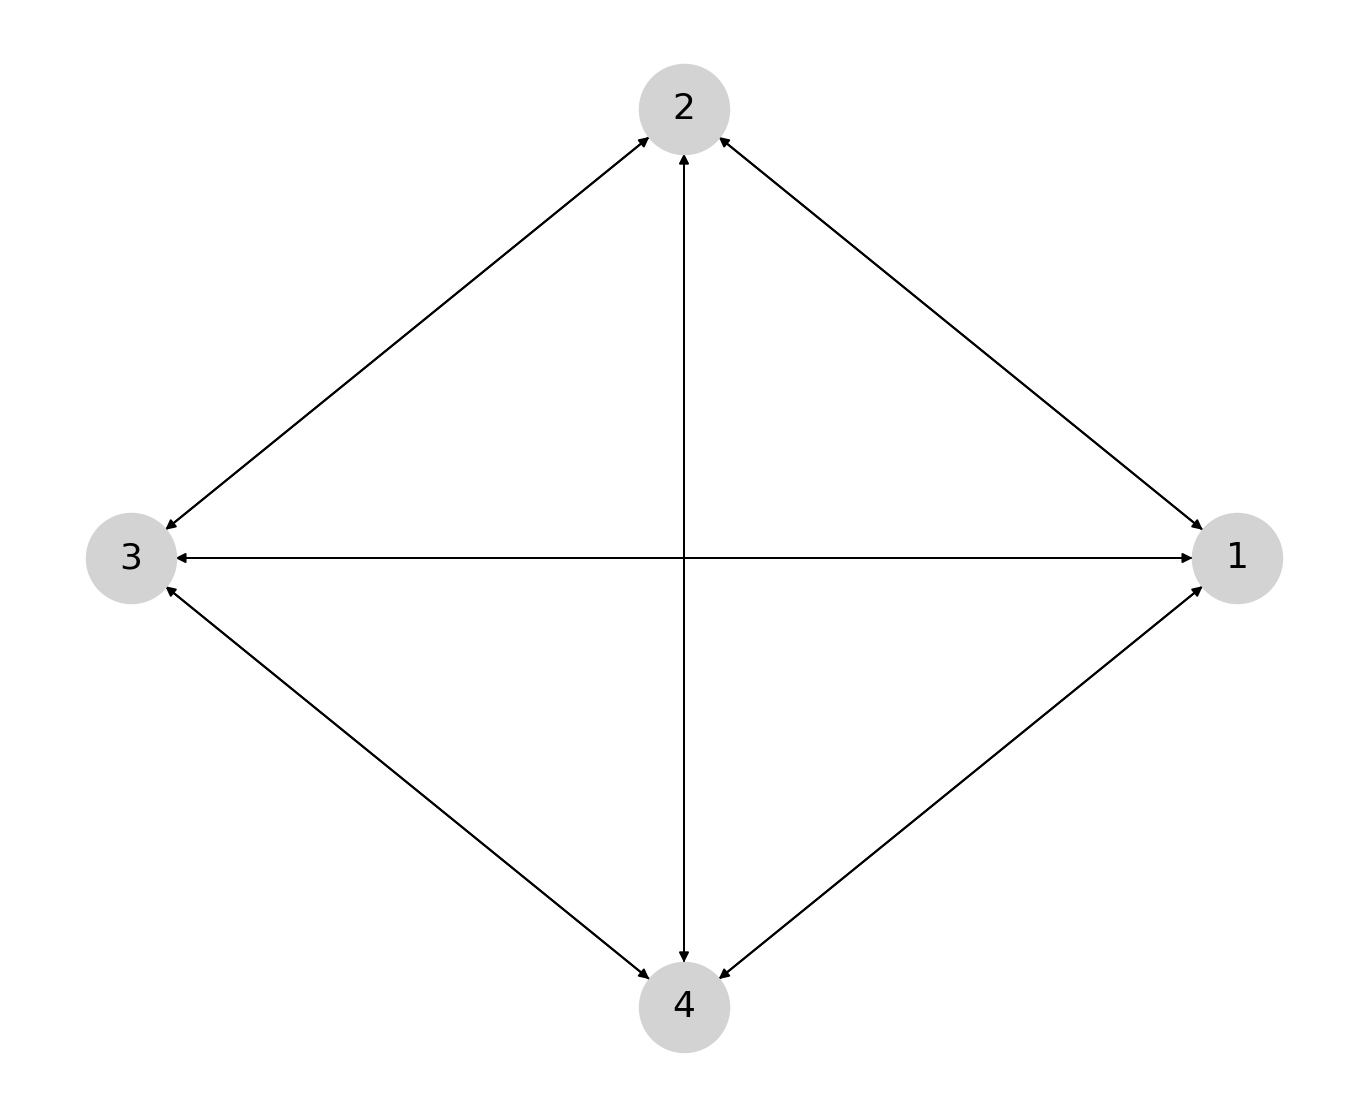

In [17]:
fig, ax = plt.subplots(figsize = (12, 10))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [38]:
node_list = get_nodes(G)
num_nodes = N
edge_list = get_edges(G)
cycle_list = get_cycle_nodes(G_ud)
num_cycles = len(cycle_list)

In [39]:
cycle_list

[[3, 2, 1], [4, 2, 1], [3, 4, 1]]

In [40]:
label_dict, label_list = get_labels(G)
print(label_dict)
print(label_list)

{(1, 3): 0.00521, (1, 4): 7.5447, (1, 2): 0.00965, (2, 3): 0.00214, (2, 1): 0.00999, (2, 4): 7.86435, (3, 2): 11.55943, (3, 4): 79.56569, (3, 1): 0.06399, (4, 2): 88.51692, (4, 1): 445.38195, (4, 3): 0.07351}
[5.2100000e-03 7.5447000e+00 9.6500000e-03 2.1400000e-03 9.9900000e-03
 7.8643500e+00 1.1559430e+01 7.9565690e+01 6.3990000e-02 8.8516920e+01
 4.4538195e+02 7.3510000e-02]


In [41]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [42]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[ 6.12093072 -1.62260639  8.55685673]


In [78]:
def initial_equilibrium_parameters_2(num_cycles,cycle_list,cycle_edges_forward,products_f,products_b,total_affinities):
    
    # tracking edges that have had their values altered
    edge_tracker = []

    # for each cycle in cycle_list
    for i in range(num_cycles):
        # choose a random edge in the "forward" direction
        j = np.random.randint(len(cycle_list[i])-1,size=1)[0]
        edge = cycle_edges_forward[i][j]
        edge_label = cycle_labels_forward[i][j]

        # if the edge is already in edge_tracker from another, choose another edge
        if edge in edge_tracker:
            k = j
            exclude_j = list(range(1,k)) + list(range(k+1, len(cycle_list[i])-1))
            j = np.random.randint(exclude_j,size=1)[0]
            edge = cycle_edges_forward[i][j]
            edge_label = cycle_labels_forward[i][j]

        edge_label = 1/(products_f[i]/(edge_label*products_b[i]))
        cycle_labels_forward[i][j] = edge_label
        # add that edge to edge_tracker
        edge_tracker.append(cycle_edges_forward[i][j])
    
    return cycle_labels_forward, edge_tracker

In [72]:
# reset labels
label_dict, label_list = get_labels(G)

In [73]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [74]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[-12.08291194  -9.65216319   9.9544422 ]


In [75]:
# tracking edges that have had their values altered
edge_tracker = []

# for each cycle in cycle_list
for i in range(num_cycles):
    # choose a random edge in the "forward" direction
    j = np.random.randint(len(cycle_list[i])-1,size=1)[0]
    edge = cycle_edges_forward[i][j]
    edge_label = cycle_labels_forward[i][j]
    
    # if the edge is already in edge_tracker from another, choose another edge
    if edge in edge_tracker:
        k = j
        exclude_j = list(range(1,k)) + list(range(k+1, len(cycle_list[i])-1))
        j = np.random.randint(exclude_j,size=1)[0]
        edge = cycle_edges_forward[i][j]
        edge_label = cycle_labels_forward[i][j]
    
    edge_label = 1/(products_f[i]/(edge_label*products_b[i]))
    cycle_labels_forward[i][j] = edge_label
    # add that edge to edge_tracker
    edge_tracker.append(cycle_edges_forward[i][j])

In [76]:
edge_tracker

[(3, 2), (2, 1), (3, 4)]

In [77]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[ 1.95156391e-17 -2.36898175e-17  5.03069808e-17]


If the affinity is < 2e-16, we will count it as 0.